In [13]:
import pandas as pd

file_path = 'match_team_statistics.csv'
data = pd.read_csv(file_path)

data.head()

,matchid,hometeamname,awayteamname,teamid,teamname,ishometeam,isawayteam,statsid,statsname,value,rank
0,2024442,Austria,North Macedonia,8,Austria,True,False,1,Goals,3,1
1,2024442,Austria,North Macedonia,8,Austria,True,False,2,Ball Possession,60,1
2,2024442,Austria,North Macedonia,8,Austria,True,False,3,Total Attempts,11,1
3,2024442,Austria,North Macedonia,8,Austria,True,False,4,Attempts on target,7,1
4,2024442,Austria,North Macedonia,8,Austria,True,False,5,Attempts off target,2,2


In [14]:
# Check for missing values
missing_values = data.isnull().sum()

missing_values

matchid         0
hometeamname    0
awayteamname    0
teamid          0
teamname        0
ishometeam      0
isawayteam      0
statsid         0
statsname       0
value           0
rank            0
dtype: int64

In [15]:
duplicates = data.duplicated().sum()
duplicates

0

In [16]:
# Check data types
data.dtypes

matchid          int64
hometeamname    object
awayteamname    object
teamid           int64
teamname        object
ishometeam        bool
isawayteam        bool
statsid          int64
statsname       object
value           object
rank             int64
dtype: object

In [17]:
# Convert 'value' column to numeric, coercing errors
data['value'] = pd.to_numeric(data['value'], errors='coerce')

In [9]:
# Fill non-numeric values in 'value' column with -1
data['value'].fillna(-1, inplace=True)

In [18]:
# Filter data for specific statistics
goals = data[data['statsname'] == 'Goals']
ball_possession = data[data['statsname'] == 'Ball Possession']
total_attempts = data[data['statsname'] == 'Total Attempts']

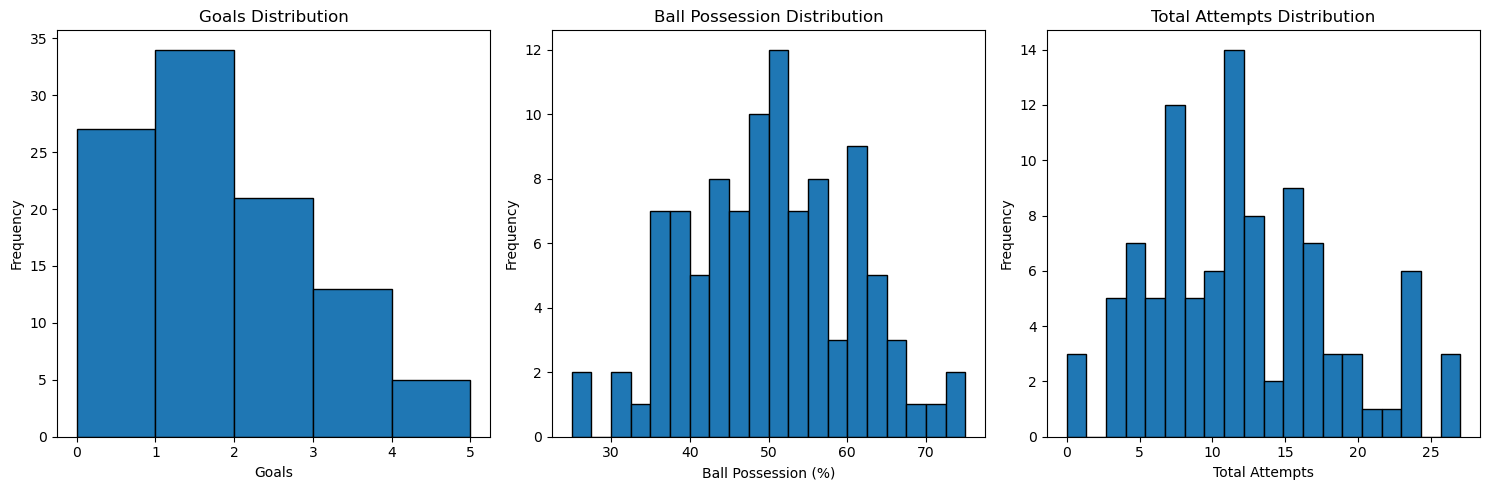

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(goals['value'], bins=range(int(goals['value'].min()), int(goals['value'].max()) + 1), edgecolor='black')
plt.title('Goals Distribution')
plt.xlabel('Goals')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(ball_possession['value'], bins=20, edgecolor='black')
plt.title('Ball Possession Distribution')
plt.xlabel('Ball Possession (%)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(total_attempts['value'], bins=20, edgecolor='black')
plt.title('Total Attempts Distribution')
plt.xlabel('Total Attempts')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
# Home vs Away Team Performance Analysis
# Group data by 'ishometeam' and 'statsname' and calculate the mean value
home_away_comparison = data.groupby(['ishometeam', 'statsname'])['value'].mean().unstack()
print(home_away_comparison)

statsname   Assists  Attacks from centre  Attacks from left  \
ishometeam                                                    
False           1.3                 6.96              16.14   
True            0.9                 6.56              17.96   

statsname   Attacks from right  Attempts Accuracy  Attempts against woodwork  \
ishometeam                                                                     
False                    17.68              34.10                       0.32   
True                     15.98              30.24                       0.34   

statsname   Attempts blocked  Attempts blocked outside penalty area  \
ishometeam                                                            
False                   2.74                               1.183673   
True                    3.30                               1.428571   

statsname   Attempts from corner  Attempts in open play  ...  \
ishometeam                                               ...   
False        

In [23]:
# Correlation Analysis
# Pivot data to create a wide-format dataframe for correlation analysis
wide_data = data.pivot_table(index='matchid', columns='statsname', values='value', aggfunc='mean')

In [24]:
# Calculate the correlation matrix
correlation_matrix = wide_data.corr()
print(correlation_matrix)

statsname                     Assists  Attacks from centre  Attacks from left  \
statsname                                                                       
Assists                      1.000000             0.278278           0.114378   
Attacks from centre          0.278278             1.000000           0.475988   
Attacks from left            0.114378             0.475988           1.000000   
Attacks from right           0.226275             0.289835           0.293794   
Attempts Accuracy            0.299719             0.180175           0.012708   
...                               ...                  ...                ...   
Top Speed (Km/h)             0.039143             0.019711           0.158061   
Total Attacks                0.244655             0.659934           0.835695   
Total Attempts               0.400424             0.696577           0.608955   
Woodwork (after deflection)  0.228802             0.101858           0.237131   
Yellow cards                

In [25]:
# Aggregated Key Statistics per Match
# Aggregate key statistics per match
key_stats = ['Goals', 'Ball Possession', 'Total Attempts', 'Assists']
match_stats = data[data['statsname'].isin(key_stats)].pivot_table(index='matchid', columns='statsname', values='value', aggfunc='mean')
print(match_stats.describe())

statsname    Assists  Ball Possession      Goals  Total Attempts
count      50.000000             50.0  50.000000       50.000000
mean        1.100000             50.0   1.370000       12.050000
std         0.728431              0.0   0.800574        3.848204
min         0.000000             50.0   0.000000        0.500000
25%         0.500000             50.0   1.000000       10.000000
50%         1.000000             50.0   1.500000       11.750000
75%         1.500000             50.0   1.875000       14.000000
max         3.000000             50.0   4.000000       21.500000


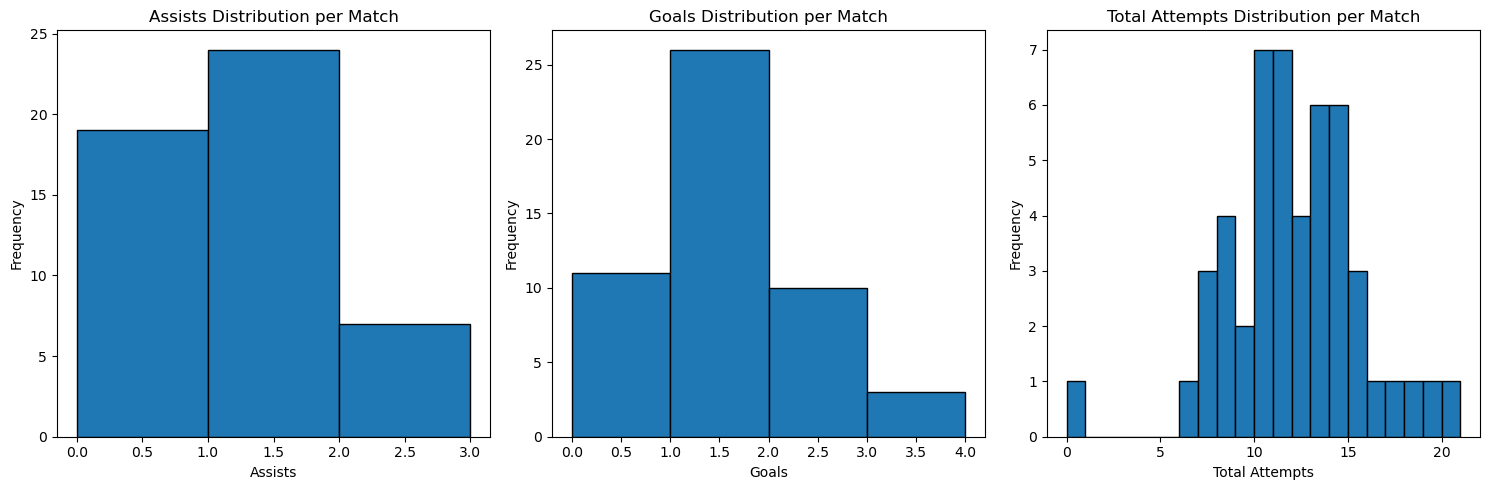

In [26]:
# Visualizations for Additional Key Statistics
# Plot histograms for Assists, Goals, and Total Attempts
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(match_stats['Assists'], bins=range(int(match_stats['Assists'].min()), int(match_stats['Assists'].max()) + 1), edgecolor='black')
plt.title('Assists Distribution per Match')
plt.xlabel('Assists')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(match_stats['Goals'], bins=range(int(match_stats['Goals'].min()), int(match_stats['Goals'].max()) + 1), edgecolor='black')
plt.title('Goals Distribution per Match')
plt.xlabel('Goals')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(match_stats['Total Attempts'], bins=range(int(match_stats['Total Attempts'].min()), int(match_stats['Total Attempts'].max()) + 1), edgecolor='black')
plt.title('Total Attempts Distribution per Match')
plt.xlabel('Total Attempts')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Exploratory Data Analysis (EDA)

Summary Statistics

    Assists: Average of 1.1 per match, max 3.
    Goals: Average of 1.37 per match, max 4.
    Total Attempts: Average of 12.05 per match, max 21.5.

Key Insights from Distributions

    Goals: Most matches have 0-3 goals.
    Ball Possession: Evenly distributed around 50%.
    Total Attempts: Generally between 0-20.

Home vs Away Team Performance

    Home teams tend to score more goals and have more total attempts.
    Away teams have higher attempts accuracy.